In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 200)         # Set output width (adjust number as needed)
pd.set_option('display.max_colwidth', None) # Show full content in each column (for long strings)

In [134]:
def count_positive_hits_3d(df, df_name, name=""):
    # Extract protein_id from filename (before "_grid")
    df_name = df_name.copy()
    df_name['protein_id'] = df_name['filename'].apply(
        lambda x: x.split('/')[-1].split('_grid')[0].replace('-positive', '')
    )

    print(df_name['protein_id'][:5])

    # Get set of protein_ids whose filename contains 'positive'
    positive_protein_ids = df_name[df_name['filename'].str.contains('positive', case=False, na=False)]['protein_id'].unique()

    # Label conditions in df
    df['is_positive_file'] = df['protein_id'].isin(positive_protein_ids)
    print(len(df['is_positive_file']), "number of lp")
    df['is_good_label'] = df['percentile_label'].isin(['PseudoPositive','StrongPositive'])

    # Count matches
    num_positive_hits = ((df['is_positive_file']) & (df['is_good_label'])).sum()
    num_good_labels = df['is_good_label'].sum()

    print(f"{name}:")
    print(f"  Total with 'positive' filename (in df_name) AND good label: {num_positive_hits}")
    print(f"  Total with good label (PseudoPositive or StrongPositive): {num_good_labels}\n")

    return num_positive_hits, num_good_labels

In [135]:
def get_per_lp_3d(df, df_name):
    # Extract protein_id from filename (before "_grid")
    df_name = df_name.copy()
    df_name['protein_id'] = df_name['filename'].apply(
        lambda x: x.split('/')[-1].split('_grid')[0].replace('-positive', '')
    )

    # Get set of protein_ids whose filename contains 'positive'
    positive_protein_ids = df_name[df_name['filename'].str.contains('positive', case=False, na=False)]['protein_id'].unique()

    # Label conditions in df
    df['is_positive_file'] = df['protein_id'].isin(positive_protein_ids)
    df['is_good_label'] = df['percentile_label'].isin(['PseudoPositive','StrongPositive'])

    return ((df['is_positive_file']) & (df['is_good_label']))

In [136]:
csv_output_exp1 = "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp1/NewResults/TestUnlabeledCaptureRates_labeled.csv"
csv_name_exp1 = "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp1/NewResults/TestUnlabeledCaptureRates.csv"
df1 = pd.read_csv(csv_output_exp1)
df1_name = pd.read_csv(csv_name_exp1)

csv_output_exp2 = "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp2/NewResults/TestUnlabeledCaptureRates_labeled.csv"
csv_name_exp2 = "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp2/NewResults/TestUnlabeledCaptureRates.csv"
df2 = pd.read_csv(csv_output_exp2)
df2_name = pd.read_csv(csv_name_exp2)

csv_output_exp3 = "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp3/NewResults/TestUnlabeledCaptureRates_labeled.csv"
csv_name_exp3 = "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp3/NewResults/TestUnlabeledCaptureRates.csv"
df3 = pd.read_csv(csv_output_exp3)
df3_name = pd.read_csv(csv_name_exp3)

csv_output_exp4 = "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp4/NewResults/TestUnlabeledCaptureRates_labeled.csv"
csv_name_exp4 = "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp4/NewResults/TestUnlabeledCaptureRates.csv"
df4 = pd.read_csv(csv_output_exp4)
df4_name = pd.read_csv(csv_name_exp4)

csv_output_exp5 = "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp5/NewResults/TestUnlabeledCaptureRates_labeled.csv"
csv_name_exp5 = "../../../Models/Cholesterol/3DCNN/3DCholesterolModels-5A_exp5/NewResults/TestUnlabeledCaptureRates.csv"
df5 = pd.read_csv(csv_output_exp5)
df5_name = pd.read_csv(csv_name_exp5)

counts = {
    'exp1': count_positive_hits_3d(df1, df1_name, name="Experiment 1"),
    'exp2': count_positive_hits_3d(df2, df2_name, name="Experiment 2"),
    'exp3': count_positive_hits_3d(df3, df3_name, name="Experiment 3"),
    'exp4': count_positive_hits_3d(df4, df4_name, name="Experiment 4"),
    'exp5': count_positive_hits_3d(df5, df5_name, name="Experiment 5"),
}

summary = pd.DataFrame(
    [{'experiment': k, 'lp_percentile_positive': v[0], 'all_percentile_positive': v[1]} for k, v in counts.items()]
).sort_values('experiment', key=lambda s: s.str.extract(r'(\d+)')[0].astype(int))


# Sample std (ddof=1) of the counts across experiments
cnn_lp_std_sample = summary['lp_percentile_positive'].std(ddof=1)
cnn_lp_mean_sample = summary['lp_percentile_positive'].mean()

cnn_all_std_sample = summary['all_percentile_positive'].std(ddof=1)
cnn_all_mean_sample = summary['all_percentile_positive'].mean()

print(summary.to_string(index=False))
print("\nStd of counts across experiments (sample std, ddof=1):", cnn_lp_std_sample)
print("Mean of counts across experiments:", cnn_lp_mean_sample)

0    1ZHY-f3
1    1ZHY-f3
2    1ZHY-f3
3    1ZHY-f3
4    1ZHY-f3
Name: protein_id, dtype: object
922 number of lp
Experiment 1:
  Total with 'positive' filename (in df_name) AND good label: 86
  Total with good label (PseudoPositive or StrongPositive): 97

0    1LRI-f4
1    1LRI-f4
2    1LRI-f4
3    1LRI-f4
4    1LRI-f4
Name: protein_id, dtype: object
923 number of lp
Experiment 2:
  Total with 'positive' filename (in df_name) AND good label: 90
  Total with good label (PseudoPositive or StrongPositive): 104

0    1LRI-f1
1    1LRI-f1
2    1LRI-f1
3    1LRI-f1
4    1LRI-f1
Name: protein_id, dtype: object
923 number of lp
Experiment 3:
  Total with 'positive' filename (in df_name) AND good label: 89
  Total with good label (PseudoPositive or StrongPositive): 99

0    1ZHY-f5
1    1ZHY-f5
2    1ZHY-f5
3    1ZHY-f5
4    1ZHY-f5
Name: protein_id, dtype: object
922 number of lp
Experiment 4:
  Total with 'positive' filename (in df_name) AND good label: 93
  Total with good label (PseudoPosi

In [137]:
cnn_exp1_per_lp = get_per_lp_3d(df1, df1_name)

lp_152_28 = glob.glob("filtered-pdbs-distinct-5A/unlabeled/*positive.pdb")

# Extract the first 6 characters from each pdb file name in lp_152_28
lp_ids = {os.path.basename(f)[:7] for f in lp_152_28}

# Get the protein_ids from df that matched your per_lp condition
matching_df = df1[get_per_lp_3d(df1, df1_name)]
df_ids = set(matching_df['protein_id'].str[:7])

print(lp_ids)
print(df_ids)

# Find intersection
matching_ids = lp_ids & df_ids

print(f"Number of matches: {len(matching_ids)}")
print(f"Matching IDs: {sorted(matching_ids)}")

{'9K1D-f1', '8U4T-f3', '8SI4-f3', '7VDH-f3', '6OS2-f4', '8W2L-f4', '5OLZ-f3', '7VFX-f1', '7V0K-f2', '7LFT-f4', '7N4X-f5', '7CKY-f3', '8SI7-f3', '2RH1-f2', '7VLA-f4', '6M47-f1', '8SI5-f2', '8EF6-f3', '7LFT-f3', '7RHR-f2', '7XT8-f2', '7WU4-f1', '8IJX-f2', '6JXI-f2', '8F7Q-f5', '5NM4-f3', '7SK4-f1', '7WYU-f2', '8JT6-f2', '9EUP-f3', '3WGU-f1', '6ZDV-f4', '7WC8-f2', '7NEQ-f2', '8GI8-f4', '8XQJ-f2', '8F7S-f1', '8SRD-f1', '9GE2-f1', '6OS2-f3', '8SIA-f3', '6BHU-f4', '7WU5-f2', '8BI0-f5', '6PS3-f3', '8JBM-f2', '8U4T-f2', '8U4T-f5', '6BHU-f3', '7YKD-f1', '7XT9-f3', '8UGY-f1', '8K66-f5', '8JBK-f2', '8QCM-f5', '8PY4-f3', '8SIA-f2', '7EJX-f3', '8F7R-f1', '8SRE-f3', '3WGU-f3', '6M0Z-f1', '7XBX-f5', '8Y6I-f2', '8G05-f5', '4XPB-f1', '7F9Y-f2', '8SI5-f1', '7WYZ-f3', '7SMS-f5', '8JZX-f1', '8GI9-f4', '8SRA-f1', '7SIL-f5', '8Q7B-f5', '8F6Y-f1', '8XOR-f1', '8PXO-f4', '7SIM-f4', '8SR8-f4', '9CDE-f2', '8SRI-f1', '8SRF-f3', '7SIM-f3', '5D6L-f4', '8SRB-f3', '8SI8-f3', '8F7R-f3', '8W8B-f1', '8IJW-f2', '5MZP-f1'

In [138]:
# helper
def count_positive_hits(df):
    has_positive_in_name = df['filename'].str.contains('positive', case=False, na=False)
    good_labels = df['percentile_label'].isin(['PseudoPositive','StrongPositive'])
    num_good_labels = good_labels.sum()
    num_positive_hits = (has_positive_in_name & good_labels).sum()

    print(f"  Total with 'positive' in filename AND good label: {num_positive_hits}")
    print(f"  Total with good label (PseudoPositive or StrongPositive): {num_good_labels}\n")

    return df[has_positive_in_name & good_labels].shape[0], df[good_labels].shape[0]

def get_per_lp(df):
    df['is_positive_file'] = df['filename'].str.contains('positive', case=False, na=False)
    df['is_good_label'] = df['percentile_label'].isin(['PseudoPositive','StrongPositive'])

    return ((df['is_positive_file']) & (df['is_good_label']))

In [139]:
csv_output_exp1 = "../../../Models/Cholesterol/GAT/GATModels-5A_exp1v2/NewResults/TestUnlabeledCaptureRates.csv"
df1 = pd.read_csv(csv_output_exp1)

csv_output_exp2 = "../../../Models/Cholesterol/GAT/GATModels-5A_exp2v2/NewResults/TestUnlabeledCaptureRates.csv"
df2 = pd.read_csv(csv_output_exp2)

csv_output_exp3 = "../../../Models/Cholesterol/GAT/GATModels-5A_exp3v2/NewResults/TestUnlabeledCaptureRates.csv"
df3 = pd.read_csv(csv_output_exp3)

csv_output_exp4 = "../../../Models/Cholesterol/GAT/GATModels-5A_exp4v2/NewResults/TestUnlabeledCaptureRates.csv"
df4 = pd.read_csv(csv_output_exp4)

csv_output_exp5 = "../../../Models/Cholesterol/GAT/GATModels-5A_exp5v2/NewResults/TestUnlabeledCaptureRates.csv"
df5 = pd.read_csv(csv_output_exp5)

counts = {
    'exp1': count_positive_hits(df1),
    'exp2': count_positive_hits(df2),
    'exp3': count_positive_hits(df3),
    'exp4': count_positive_hits(df4),
    'exp5': count_positive_hits(df5),
}

summary = pd.DataFrame(
    [{'experiment': k, 'lp_percentile_positive': v[0], 'all_percentile_positive': v[1]} for k, v in counts.items()]
).sort_values('experiment', key=lambda s: s.str.extract(r'(\d+)')[0].astype(int))


# Sample std (ddof=1) of the counts across experiments
gat_lp_std_sample = summary['lp_percentile_positive'].std(ddof=1)
gat_lp_mean_sample = summary['lp_percentile_positive'].mean()

gat_all_std_sample = summary['all_percentile_positive'].std(ddof=1)
gat_all_mean_sample = summary['all_percentile_positive'].mean()

print(summary.to_string(index=False))
print("\nStd of counts across experiments (sample std, ddof=1):", gat_lp_std_sample)
print("Mean of counts across experiments:", gat_lp_mean_sample)

  Total with 'positive' in filename AND good label: 100
  Total with good label (PseudoPositive or StrongPositive): 109

  Total with 'positive' in filename AND good label: 75
  Total with good label (PseudoPositive or StrongPositive): 90

  Total with 'positive' in filename AND good label: 72
  Total with good label (PseudoPositive or StrongPositive): 79

  Total with 'positive' in filename AND good label: 97
  Total with good label (PseudoPositive or StrongPositive): 111

  Total with 'positive' in filename AND good label: 75
  Total with good label (PseudoPositive or StrongPositive): 85

experiment  lp_percentile_positive  all_percentile_positive
      exp1                     100                      109
      exp2                      75                       90
      exp3                      72                       79
      exp4                      97                      111
      exp5                      75                       85

Std of counts across experiments (sample 

In [140]:
gat_exp1_per_lp = get_per_lp(df1)

lp_152_28 = glob.glob("filtered-pdbs-distinct-5A/unlabeled/*positive.pdb")

# Extract the first 6 characters from each pdb file name in lp_152_28
lp_ids = {os.path.basename(f)[:7] for f in lp_152_28}

# Get the protein_ids from df that matched your per_lp condition
matching_df = df1[get_per_lp(df1)]
df_ids = set(matching_df['filename'].apply(lambda x: os.path.basename(x)[:7]))

print(lp_ids)
print(df_ids)

# Find intersection
matching_ids = lp_ids & df_ids

print(f"Number of matches: {len(matching_ids)}")
print(f"Matching IDs: {sorted(matching_ids)}")

{'9K1D-f1', '8U4T-f3', '8SI4-f3', '7VDH-f3', '6OS2-f4', '8W2L-f4', '5OLZ-f3', '7VFX-f1', '7V0K-f2', '7LFT-f4', '7N4X-f5', '7CKY-f3', '8SI7-f3', '2RH1-f2', '7VLA-f4', '6M47-f1', '8SI5-f2', '8EF6-f3', '7LFT-f3', '7RHR-f2', '7XT8-f2', '7WU4-f1', '8IJX-f2', '6JXI-f2', '8F7Q-f5', '5NM4-f3', '7SK4-f1', '7WYU-f2', '8JT6-f2', '9EUP-f3', '3WGU-f1', '6ZDV-f4', '7WC8-f2', '7NEQ-f2', '8GI8-f4', '8XQJ-f2', '8F7S-f1', '8SRD-f1', '9GE2-f1', '6OS2-f3', '8SIA-f3', '6BHU-f4', '7WU5-f2', '8BI0-f5', '6PS3-f3', '8JBM-f2', '8U4T-f2', '8U4T-f5', '6BHU-f3', '7YKD-f1', '7XT9-f3', '8UGY-f1', '8K66-f5', '8JBK-f2', '8QCM-f5', '8PY4-f3', '8SIA-f2', '7EJX-f3', '8F7R-f1', '8SRE-f3', '3WGU-f3', '6M0Z-f1', '7XBX-f5', '8Y6I-f2', '8G05-f5', '4XPB-f1', '7F9Y-f2', '8SI5-f1', '7WYZ-f3', '7SMS-f5', '8JZX-f1', '8GI9-f4', '8SRA-f1', '7SIL-f5', '8Q7B-f5', '8F6Y-f1', '8XOR-f1', '8PXO-f4', '7SIM-f4', '8SR8-f4', '9CDE-f2', '8SRI-f1', '8SRF-f3', '7SIM-f3', '5D6L-f4', '8SRB-f3', '8SI8-f3', '8F7R-f3', '8W8B-f1', '8IJW-f2', '5MZP-f1'

In [141]:
csv_output_exp1 = "../../../Models/Cholesterol/GNN/GNN-5A_Exp1/NewResults/TestUnlabeledCaptureRates.csv"
df1 = pd.read_csv(csv_output_exp1)

csv_output_exp2 = "../../../Models/Cholesterol/GNN/GNN-5A_Exp2/NewResults/TestUnlabeledCaptureRates.csv"
df2 = pd.read_csv(csv_output_exp2)

csv_output_exp3 = "../../../Models/Cholesterol/GNN/GNN-5A_Exp3/NewResults/TestUnlabeledCaptureRates.csv"
df3 = pd.read_csv(csv_output_exp3)

csv_output_exp4 = "../../../Models/Cholesterol/GNN/GNN-5A_Exp4/NewResults/TestUnlabeledCaptureRates.csv"
df4 = pd.read_csv(csv_output_exp4)

csv_output_exp5 = "../../../Models/Cholesterol/GNN/GNN-5A_Exp5/NewResults/TestUnlabeledCaptureRates.csv"
df5 = pd.read_csv(csv_output_exp5)

counts = {
    'exp1': count_positive_hits(df1),
    'exp2': count_positive_hits(df2),
    'exp3': count_positive_hits(df3),
    'exp4': count_positive_hits(df4),
    'exp5': count_positive_hits(df5),
}

summary = pd.DataFrame(
    [{'experiment': k, 'lp_percentile_positive': v[0], 'all_percentile_positive': v[1]} for k, v in counts.items()]
).sort_values('experiment', key=lambda s: s.str.extract(r'(\d+)')[0].astype(int))


# Sample std (ddof=1) of the counts across experiments
gnn_lp_std_sample = summary['lp_percentile_positive'].std(ddof=1)
gnn_lp_mean_sample = summary['lp_percentile_positive'].mean()

gnn_all_std_sample = summary['all_percentile_positive'].std(ddof=1)
gnn_all_mean_sample = summary['all_percentile_positive'].mean()

print(summary.to_string(index=False))
print("\nStd of counts across experiments (sample std, ddof=1):", gnn_lp_std_sample)
print("Mean of counts across experiments:", gnn_lp_mean_sample)

  Total with 'positive' in filename AND good label: 163
  Total with good label (PseudoPositive or StrongPositive): 188

  Total with 'positive' in filename AND good label: 145
  Total with good label (PseudoPositive or StrongPositive): 166

  Total with 'positive' in filename AND good label: 138
  Total with good label (PseudoPositive or StrongPositive): 159

  Total with 'positive' in filename AND good label: 165
  Total with good label (PseudoPositive or StrongPositive): 185

  Total with 'positive' in filename AND good label: 157
  Total with good label (PseudoPositive or StrongPositive): 175

experiment  lp_percentile_positive  all_percentile_positive
      exp1                     163                      188
      exp2                     145                      166
      exp3                     138                      159
      exp4                     165                      185
      exp5                     157                      175

Std of counts across experiments (

In [142]:
gnn_exp1_per_lp = get_per_lp(df1)

lp_152_28 = glob.glob("filtered-pdbs-distinct-5A/unlabeled/*positive.pdb")

# Extract the first 6 characters from each pdb file name in lp_152_28
lp_ids = {os.path.basename(f)[:7] for f in lp_152_28}

# Get the protein_ids from df that matched your per_lp condition
matching_df = df1[get_per_lp(df1)]
df_ids = set(matching_df['filename'].apply(lambda x: os.path.basename(x)[:7]))

print(lp_ids)
print(df_ids)

# Find intersection
matching_ids = lp_ids & df_ids

print(f"Number of matches: {len(matching_ids)}")
print(f"Matching IDs: {sorted(matching_ids)}")

{'9K1D-f1', '8U4T-f3', '8SI4-f3', '7VDH-f3', '6OS2-f4', '8W2L-f4', '5OLZ-f3', '7VFX-f1', '7V0K-f2', '7LFT-f4', '7N4X-f5', '7CKY-f3', '8SI7-f3', '2RH1-f2', '7VLA-f4', '6M47-f1', '8SI5-f2', '8EF6-f3', '7LFT-f3', '7RHR-f2', '7XT8-f2', '7WU4-f1', '8IJX-f2', '6JXI-f2', '8F7Q-f5', '5NM4-f3', '7SK4-f1', '7WYU-f2', '8JT6-f2', '9EUP-f3', '3WGU-f1', '6ZDV-f4', '7WC8-f2', '7NEQ-f2', '8GI8-f4', '8XQJ-f2', '8F7S-f1', '8SRD-f1', '9GE2-f1', '6OS2-f3', '8SIA-f3', '6BHU-f4', '7WU5-f2', '8BI0-f5', '6PS3-f3', '8JBM-f2', '8U4T-f2', '8U4T-f5', '6BHU-f3', '7YKD-f1', '7XT9-f3', '8UGY-f1', '8K66-f5', '8JBK-f2', '8QCM-f5', '8PY4-f3', '8SIA-f2', '7EJX-f3', '8F7R-f1', '8SRE-f3', '3WGU-f3', '6M0Z-f1', '7XBX-f5', '8Y6I-f2', '8G05-f5', '4XPB-f1', '7F9Y-f2', '8SI5-f1', '7WYZ-f3', '7SMS-f5', '8JZX-f1', '8GI9-f4', '8SRA-f1', '7SIL-f5', '8Q7B-f5', '8F6Y-f1', '8XOR-f1', '8PXO-f4', '7SIM-f4', '8SR8-f4', '9CDE-f2', '8SRI-f1', '8SRF-f3', '7SIM-f3', '5D6L-f4', '8SRB-f3', '8SI8-f3', '8F7R-f3', '8W8B-f1', '8IJW-f2', '5MZP-f1'

In [143]:
csv_output_exp1 = "../../../Models/Cholesterol/GCN/GCN-5A_Exp1/Results/TestUnlabeledCaptureRates.csv"
df1 = pd.read_csv(csv_output_exp1)

csv_output_exp2 = "../../../Models/Cholesterol/GCN/GCN-5A_Exp2/Results/TestUnlabeledCaptureRates.csv"
df2 = pd.read_csv(csv_output_exp2)

csv_output_exp3 = "../../../Models/Cholesterol/GCN/GCN-5A_Exp3/Results/TestUnlabeledCaptureRates.csv"
df3 = pd.read_csv(csv_output_exp3)

csv_output_exp4 = "../../../Models/Cholesterol/GCN/GCN-5A_Exp4/Results/TestUnlabeledCaptureRates.csv"
df4 = pd.read_csv(csv_output_exp4)

csv_output_exp5 = "../../../Models/Cholesterol/GCN/GCN-5A_Exp5/Results/TestUnlabeledCaptureRates.csv"
df5 = pd.read_csv(csv_output_exp5)

counts = {
    'exp1': count_positive_hits(df1),
    'exp2': count_positive_hits(df2),
    'exp3': count_positive_hits(df3),
    'exp4': count_positive_hits(df4),
    'exp5': count_positive_hits(df5),
}

summary = pd.DataFrame(
    [{'experiment': k, 'lp_percentile_positive': v[0], 'all_percentile_positive': v[1]} for k, v in counts.items()]
).sort_values('experiment', key=lambda s: s.str.extract(r'(\d+)')[0].astype(int))


# Sample std (ddof=1) of the counts across experiments
gcn_lp_std_sample = summary['lp_percentile_positive'].std(ddof=1)
gcn_lp_mean_sample = summary['lp_percentile_positive'].mean()

gcn_all_std_sample = summary['all_percentile_positive'].std(ddof=1)
gcn_all_mean_sample = summary['all_percentile_positive'].mean()

print(summary.to_string(index=False))
print("\nStd of counts across experiments (sample std, ddof=1):", gcn_lp_std_sample)
print("Mean of counts across experiments:", gcn_lp_mean_sample)

  Total with 'positive' in filename AND good label: 97
  Total with good label (PseudoPositive or StrongPositive): 107

  Total with 'positive' in filename AND good label: 89
  Total with good label (PseudoPositive or StrongPositive): 100

  Total with 'positive' in filename AND good label: 86
  Total with good label (PseudoPositive or StrongPositive): 96

  Total with 'positive' in filename AND good label: 100
  Total with good label (PseudoPositive or StrongPositive): 111

  Total with 'positive' in filename AND good label: 95
  Total with good label (PseudoPositive or StrongPositive): 108

experiment  lp_percentile_positive  all_percentile_positive
      exp1                      97                      107
      exp2                      89                      100
      exp3                      86                       96
      exp4                     100                      111
      exp5                      95                      108

Std of counts across experiments (sampl

In [144]:
gcn_exp1_per_lp = get_per_lp(df1)

lp_152_28 = glob.glob("filtered-pdbs-distinct-5A/unlabeled/*positive.pdb")

# Extract the first 6 characters from each pdb file name in lp_152_28
lp_ids = {os.path.basename(f)[:7] for f in lp_152_28}

# Get the protein_ids from df that matched your per_lp condition
matching_df = df1[get_per_lp(df1)]
df_ids = set(matching_df['filename'].apply(lambda x: os.path.basename(x)[:7]))

print(lp_ids)
print(df_ids)

# Find intersection
matching_ids = lp_ids & df_ids

print(f"Number of matches: {len(matching_ids)}")
print(f"Matching IDs: {sorted(matching_ids)}")

{'9K1D-f1', '8U4T-f3', '8SI4-f3', '7VDH-f3', '6OS2-f4', '8W2L-f4', '5OLZ-f3', '7VFX-f1', '7V0K-f2', '7LFT-f4', '7N4X-f5', '7CKY-f3', '8SI7-f3', '2RH1-f2', '7VLA-f4', '6M47-f1', '8SI5-f2', '8EF6-f3', '7LFT-f3', '7RHR-f2', '7XT8-f2', '7WU4-f1', '8IJX-f2', '6JXI-f2', '8F7Q-f5', '5NM4-f3', '7SK4-f1', '7WYU-f2', '8JT6-f2', '9EUP-f3', '3WGU-f1', '6ZDV-f4', '7WC8-f2', '7NEQ-f2', '8GI8-f4', '8XQJ-f2', '8F7S-f1', '8SRD-f1', '9GE2-f1', '6OS2-f3', '8SIA-f3', '6BHU-f4', '7WU5-f2', '8BI0-f5', '6PS3-f3', '8JBM-f2', '8U4T-f2', '8U4T-f5', '6BHU-f3', '7YKD-f1', '7XT9-f3', '8UGY-f1', '8K66-f5', '8JBK-f2', '8QCM-f5', '8PY4-f3', '8SIA-f2', '7EJX-f3', '8F7R-f1', '8SRE-f3', '3WGU-f3', '6M0Z-f1', '7XBX-f5', '8Y6I-f2', '8G05-f5', '4XPB-f1', '7F9Y-f2', '8SI5-f1', '7WYZ-f3', '7SMS-f5', '8JZX-f1', '8GI9-f4', '8SRA-f1', '7SIL-f5', '8Q7B-f5', '8F6Y-f1', '8XOR-f1', '8PXO-f4', '7SIM-f4', '8SR8-f4', '9CDE-f2', '8SRI-f1', '8SRF-f3', '7SIM-f3', '5D6L-f4', '8SRB-f3', '8SI8-f3', '8F7R-f3', '8W8B-f1', '8IJW-f2', '5MZP-f1'

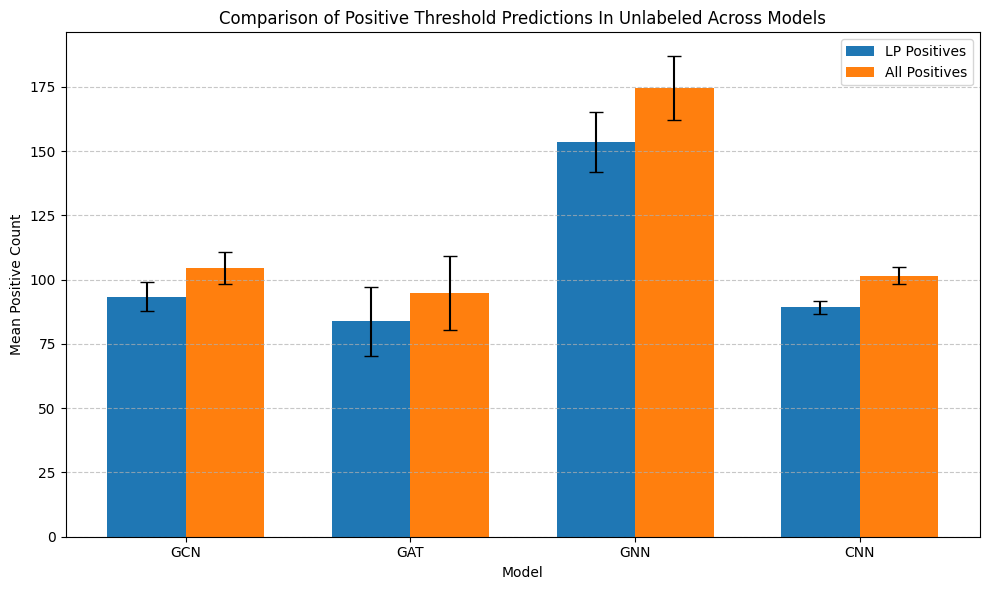

In [145]:
# Define models
models = ['GCN', 'GAT', 'GNN', 'CNN']

# Mean values for lp_percentile_positive
lp_means = [
    gcn_lp_mean_sample,
    gat_lp_mean_sample,
    gnn_lp_mean_sample,
    cnn_lp_mean_sample
]

# Std dev for lp_percentile_positive
lp_stds = [
    gcn_lp_std_sample,
    gat_lp_std_sample,
    gnn_lp_std_sample,
    cnn_lp_std_sample
]

# Mean values for all_percentile_positive
all_means = [
    gcn_all_mean_sample,
    gat_all_mean_sample,
    gnn_all_mean_sample,
    cnn_all_mean_sample
]

# Std dev for all_percentile_positive
all_stds = [
    gcn_all_std_sample,
    gat_all_std_sample,
    gnn_all_std_sample,
    cnn_all_std_sample
]

# X-axis positions
x = np.arange(len(models))
width = 0.35  # width of each bar

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width/2, lp_means, width, yerr=lp_stds, capsize=5, label='LP Positives')
bars2 = ax.bar(x + width/2, all_means, width, yerr=all_stds, capsize=5, label='All Positives')

# Labels & title
ax.set_xlabel('Model')
ax.set_ylabel('Mean Positive Count')
ax.set_title('Comparison of Positive Threshold Predictions In Unlabeled Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()